CSCI 4852 & 6952: Deep Learning (Spring 2023)  

Instructor: Alina Lazar (alazar@ysu.edu)  
GitHub repository:https://github.com/alinutzal/CSCI-xx52-Deep-Learning-
---

# MLP with Dropout 

## Imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# From local helper files
from helper_evaluation import set_all_seeds, set_deterministic
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples
from helper_dataset import get_dataloaders_mnist

## Settings and Dataset

In [3]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 75
NUM_HIDDEN_2 = 45
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
set_all_seeds(RANDOM_SEED)
#set_deterministic()

In [5]:
##########################
### MNIST DATASET
##########################

train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


## Model

In [6]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, num_features, num_classes, drop_proba, 
                 num_hidden_1, num_hidden_2):
        super().__init__()
        
        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(num_features, num_hidden_1),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(num_hidden_1, num_hidden_2),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(num_hidden_2, num_classes)
        )

        for m in self.modules():
            if isinstance(m, torch.nn.Linear):
                torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    m.bias.detach().zero_()
           
    def forward(self, x):
        logits = self.my_network(x)
        return logits

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.6304
Epoch: 001/050 | Batch 0050/0210 | Loss: 0.6442
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.3850
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.3311
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.2582
Epoch: 001/050 | Train: 90.85% | Validation: 92.55%
Time elapsed: 0.16 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.2813
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.3330
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.2894
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.2680
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.2470
Epoch: 002/050 | Train: 92.97% | Validation: 94.53%
Time elapsed: 0.31 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.2368
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.2123
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.2535
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.2411
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.2201
Epoch: 003/050 | Train: 93.89% | Validation: 94.80%
Time elapsed: 0.46 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.2237
Epoch: 

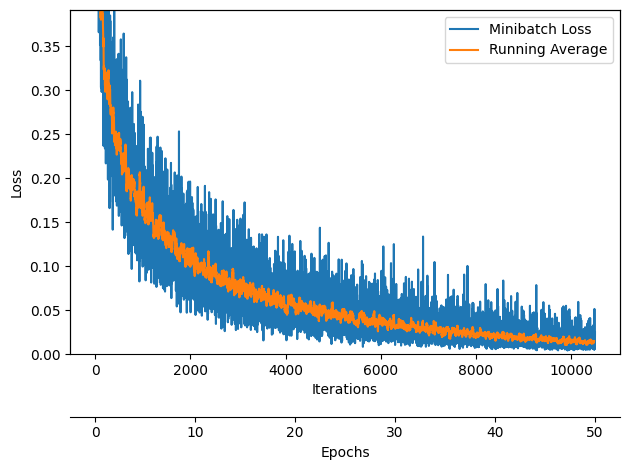

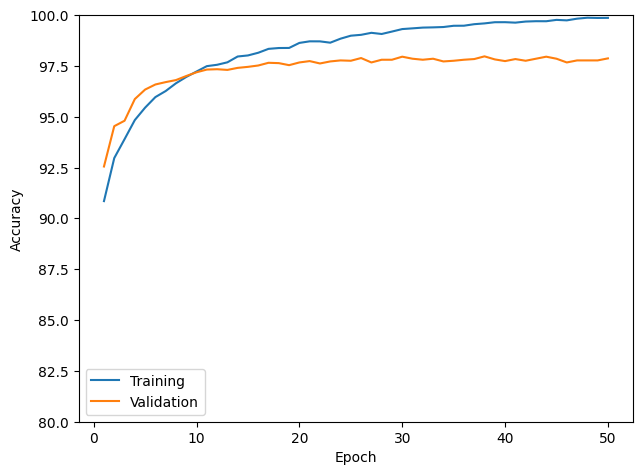

<Figure size 640x480 with 0 Axes>

In [7]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(num_features=28*28,
                             num_hidden_1=NUM_HIDDEN_1,
                             num_hidden_2=NUM_HIDDEN_2,
                             drop_proba=0.5,
                             num_classes=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
#plt.show()
#plt.figure(figsize=(8,12))
plt.savefig('loss.jpg')
plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
#plt.show()
plt.savefig('train_valacc.jpg')